# Non linear least squares curve fitting

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") 

# yfinance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
symbol = 'AMD'

start = '2021-01-01'
end = '2022-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,92.110001,96.059998,90.919998,92.300003,92.300003,51802600
2021-01-05,92.099998,93.209999,91.410004,92.769997,92.769997,34208000
2021-01-06,91.620003,92.279999,89.459999,90.330002,90.330002,51911700
2021-01-07,91.330002,95.510002,91.199997,95.160004,95.160004,42897200
2021-01-08,95.980003,96.400002,93.269997,94.580002,94.580002,39816400


In [3]:
df['Returns'] = df['Adj Close'].pct_change() 
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2021-01-05,92.099998,93.209999,91.410004,92.769997,92.769997,34208000,0.005092
2021-01-06,91.620003,92.279999,89.459999,90.330002,90.330002,51911700,-0.026302
2021-01-07,91.330002,95.510002,91.199997,95.160004,95.160004,42897200,0.053471
2021-01-08,95.980003,96.400002,93.269997,94.580002,94.580002,39816400,-0.006095
2021-01-11,94.029999,99.230003,93.760002,97.250000,97.250000,48600200,0.028230


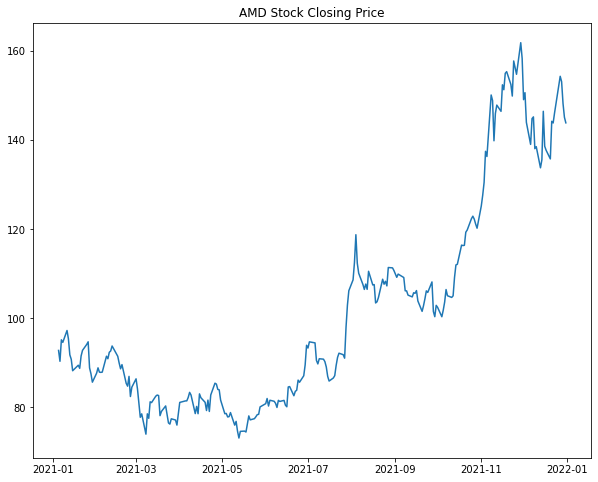

In [4]:
plt.figure(figsize=(10,8))
plt.plot(df['Adj Close'])
plt.title(symbol + ' Stock Closing Price')
plt.show()

In [5]:
def model(t, coeffs):
   return coeffs[0] + coeffs[1] * np.exp( - ((t-coeffs[2])/coeffs[3])**2 )

In [6]:
x = np.round(np.array(df['Adj Close']).squeeze(), 2)

In [7]:
import collections

print([item for item, count in collections.Counter(x).items() if count > 1])

[79.06, 82.76, 78.55, 106.15]


In [8]:
x0 = np.array(x, dtype=float)

In [9]:
def residuals(coeffs, y, t):
    return y - model(t, coeffs)

In [10]:
from scipy.optimize import leastsq

t = np.arange(len(df['Adj Close']))
x, flag = leastsq(residuals, x0, args=(df['Adj Close'], t))

print(x)

[ 221.90203076 -142.48610387   72.3772972   207.85692932   97.25
   95.36         91.78         90.79         88.21         89.45
   88.75         91.53         92.79         94.13         94.71
   88.84         87.52         85.64         87.66         88.86
   87.89         87.84         87.9          91.47         90.91
   92.35         92.66         93.77         91.46         89.94
   88.64         89.58         85.37         84.74         86.94
   82.42         84.51         86.39         84.13         80.86
   77.75         78.52         73.96         78.53         77.52
   81.23         81.05         82.5          82.75         82.63
   78.12         79.06         80.3          78.38         76.48
   76.22         77.41         77.14         76.           78.5
   81.09         81.43         81.44         82.2          83.35
   82.76         78.58         80.19         78.55         83.01
   82.15         81.11         79.27         81.61         79.06
   82.76         85.41    

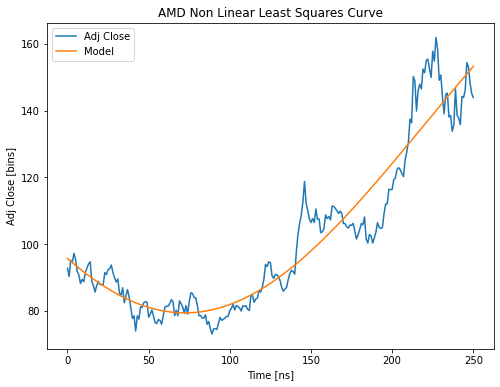

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(t, df['Adj Close'], t, model(t, x))
plt.title(symbol + ' Non Linear Least Squares Curve')
plt.xlabel('Time [ns]')
plt.ylabel('Adj Close [bins]')
plt.legend(['Adj Close', 'Model'])
plt.show()